In [1]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from collections import Counter
from IPython.display import Image  
import pydotplus

# Configuring the notebook
sns.set()
%matplotlib inline

# Reading the data
data = pd.read_csv('creditcard.csv')

In [2]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.fillna(data.mean(), inplace=True)

In [7]:
z_scores = (data - data.mean()) / data.std()
outliers = (np.abs(z_scores) > 3).any(axis=1)
print("Number of outliers:", outliers.sum())

Number of outliers: 37864


C:\Users\leend\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\leend\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\leend\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

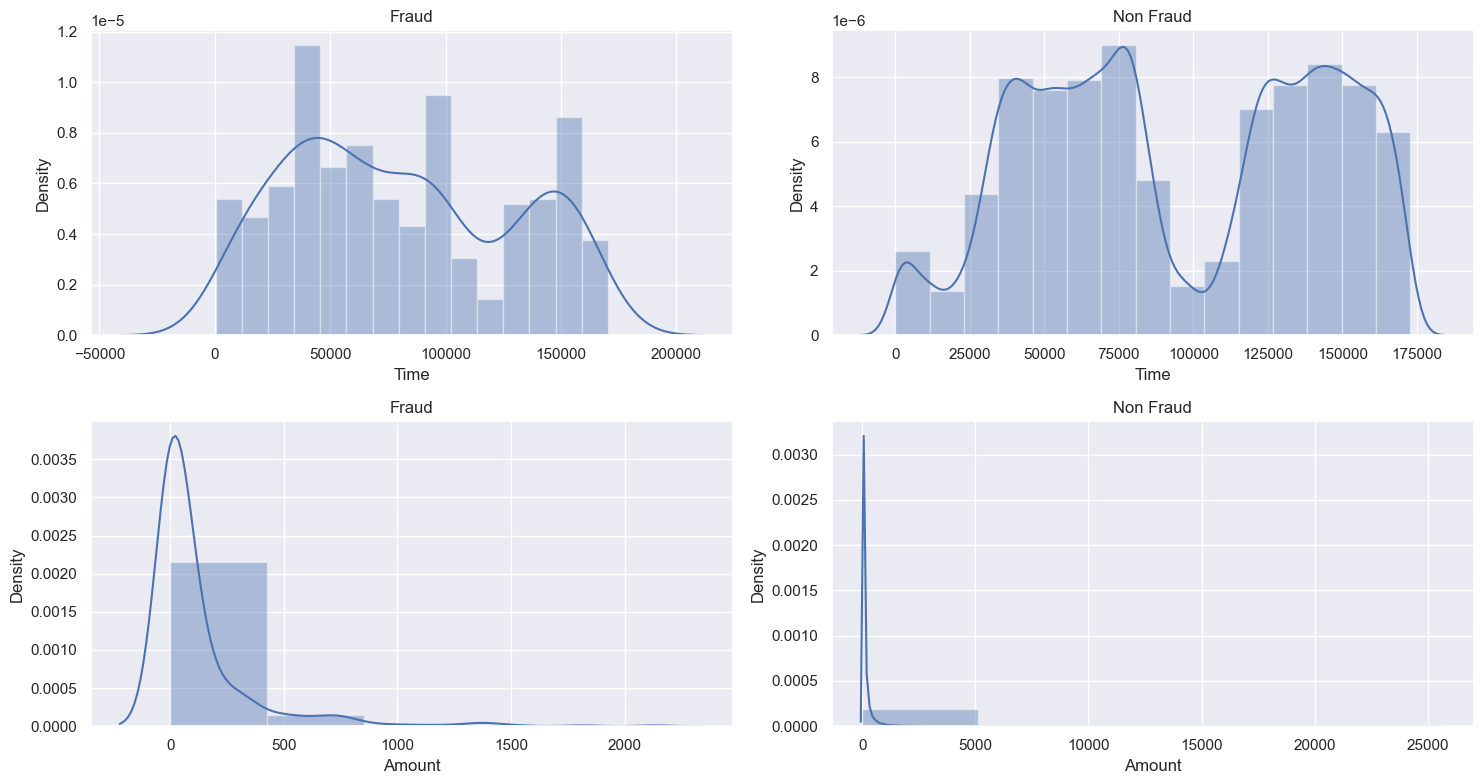

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
sns.distplot(data['Time'][data['Class'] == 1], bins=15, ax=ax1)
sns.distplot(data['Time'][data['Class'] == 0], bins=15, ax=ax2)

sns.distplot(data['Amount'][data['Class'] == 1], bins=5, ax=ax3)
sns.distplot(data['Amount'][data['Class'] == 0], bins=5, ax=ax4)

ax1.set_title('Fraud')
ax2.set_title('Non Fraud')
ax3.set_title('Fraud')
ax4.set_title('Non Fraud')
plt.tight_layout()
plt.show()
     

C:\Users\leend\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


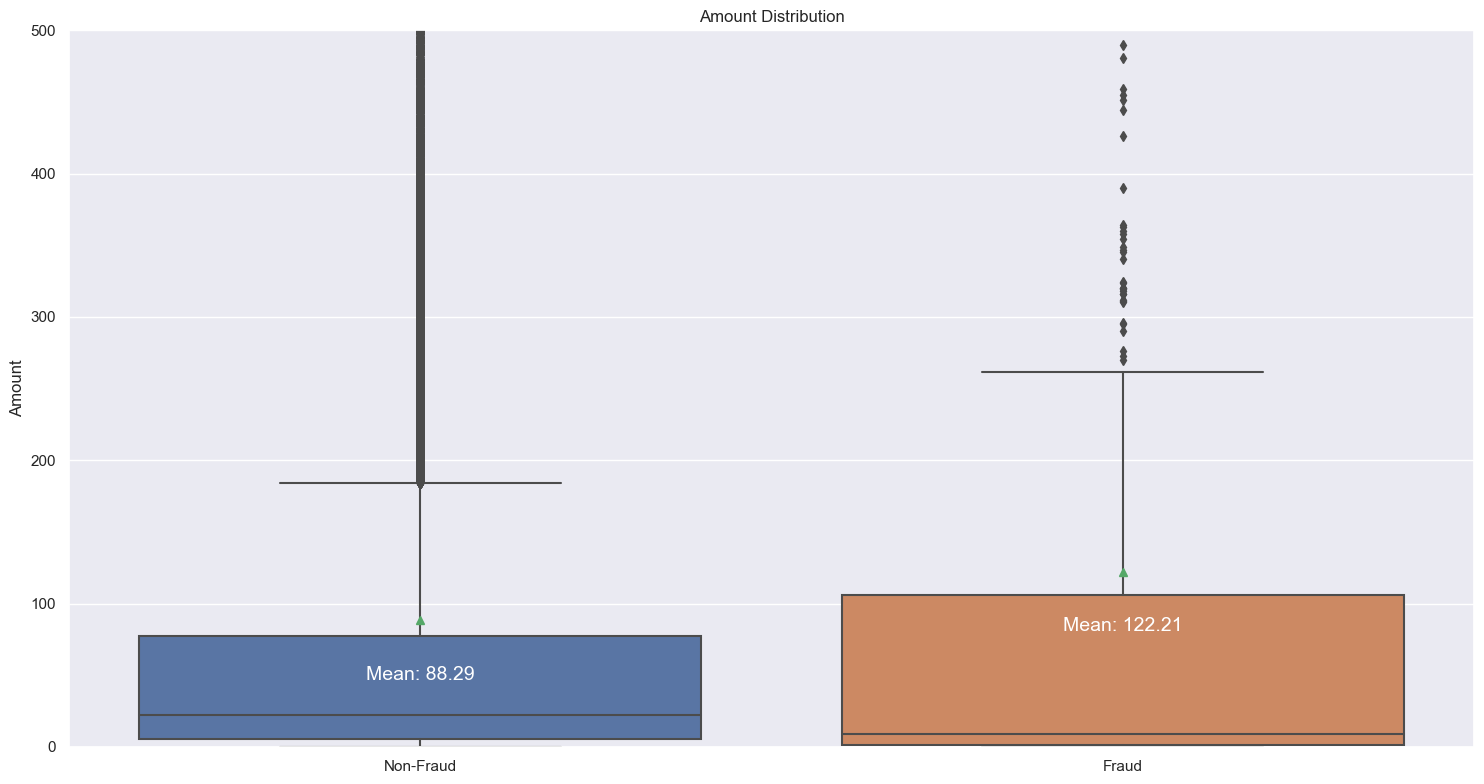

In [9]:
fig, ax = plt.subplots(figsize=(15,8))

box_plot = sns.boxplot(data['Class'], data['Amount'], showmeans=True, ax=ax)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
ax.set_ylim(0, 500)
ax.set_title('Amount Distribution')
ax.set_xlabel('')

means = data.groupby(['Class'])['Amount'].mean()
vertical_offset = data['Amount'].mean() - 130 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick] + vertical_offset, f'Mean: {round(means[xtick], 2)}', 
            horizontalalignment='center', fontsize=14, color='w')

plt.tight_layout()
plt.show()

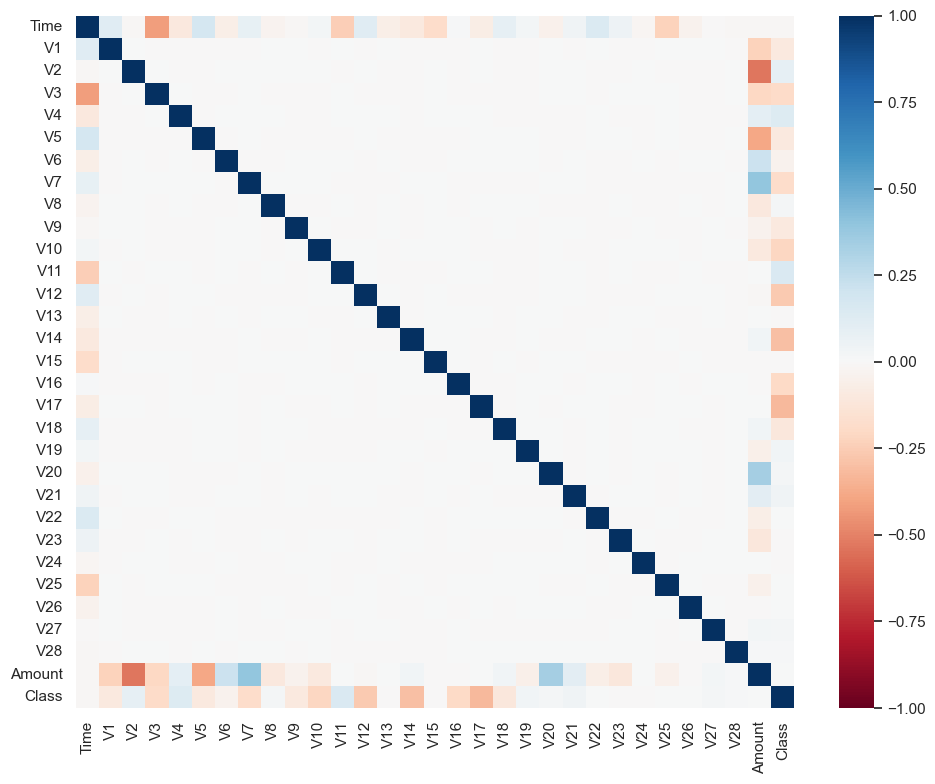

In [10]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='RdBu', vmin=-1)

plt.tight_layout()
plt.show()
     


0    0.998273
1    0.001727
Name: Class, dtype: float64


C:\Users\leend\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


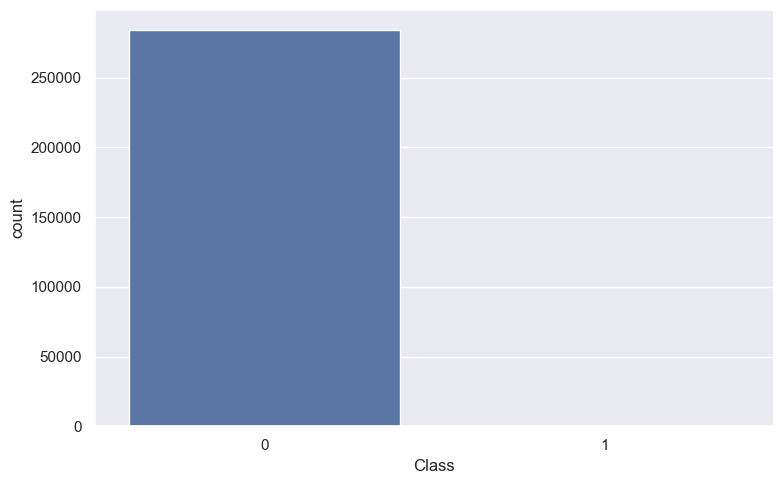

In [11]:
print(data['Class'].value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data['Class'])

plt.tight_layout()
plt.show()
     


In [12]:
scaler = StandardScaler()

data['std_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['std_time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

data.drop(['Amount', 'Time'], axis=1, inplace=True)
data.head()
     


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [13]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
     

0    0.5
1    0.5
Name: Class, dtype: float64


C:\Users\leend\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


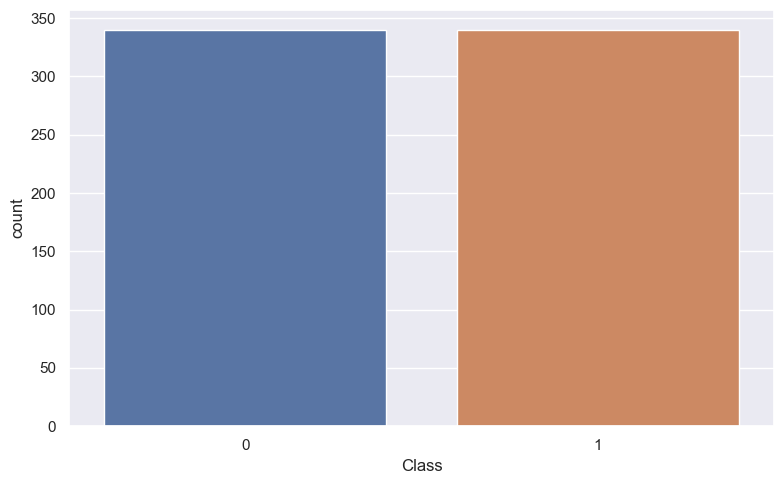

In [14]:
from imblearn.under_sampling import RandomUnderSampler

# Create a RandomUnderSampler object
rus = RandomUnderSampler()

# Use fit_resample instead of fit_sample
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print(pd.Series(y_rus).value_counts(normalize=True))
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y_rus)

plt.tight_layout()
plt.show()

0    0.5
1    0.5
Name: Class, dtype: float64


C:\Users\leend\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


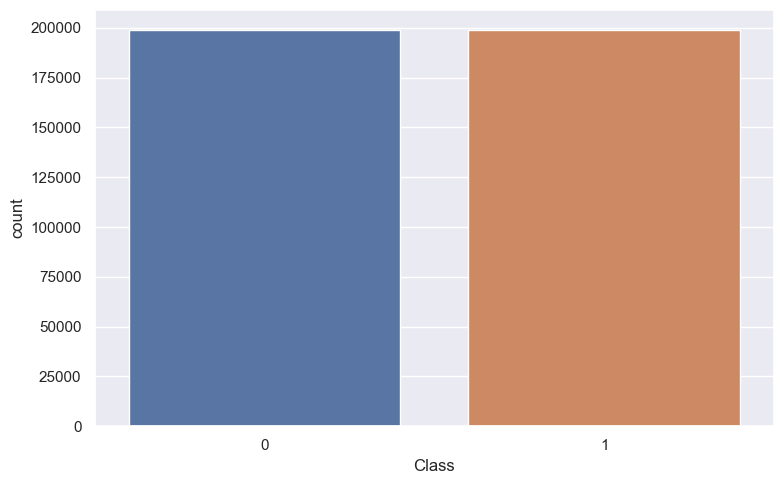

In [15]:
from imblearn.over_sampling import RandomOverSampler

# Create a RandomUnderSampler object
ros = RandomOverSampler()

# Use fit_resample instead of fit_sample
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print(pd.Series(y_ros).value_counts(normalize=True))
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y_ros)

plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85291
           1       0.04      0.92      0.08       152

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443



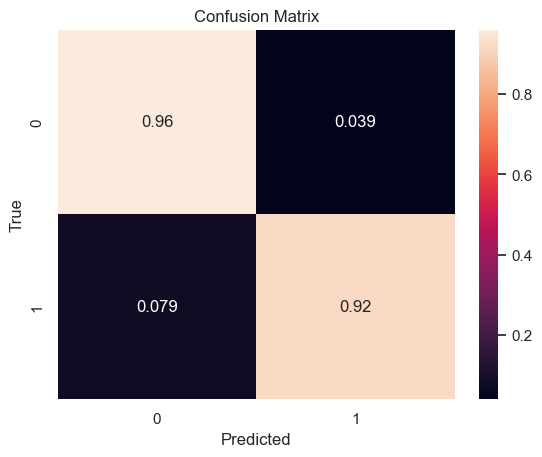

ROC AUC Score: 0.9411


In [16]:
# logistic regression
log_reg_under = LogisticRegression()

log_reg_under.fit(X_rus, y_rus)

y_pred_log_under = log_reg_under.predict(X_test)


def report(pred):
    print(classification_report(y_test, pred))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, pred, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, pred), 4)}')

report(y_pred_log_under)
     

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85291
           1       0.06      0.91      0.12       152

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443



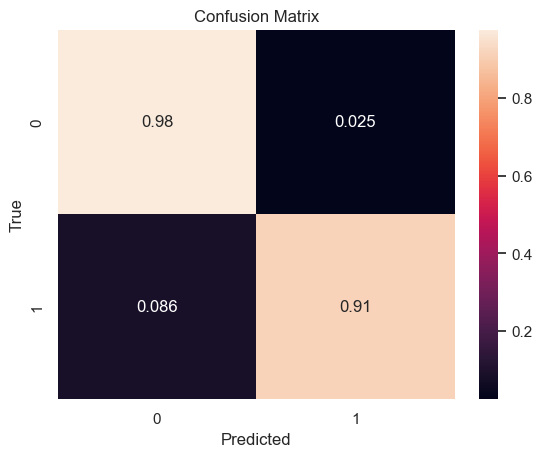

ROC AUC Score: 0.9448


In [17]:
log_reg_over = LogisticRegression()

log_reg_over.fit(X_ros, y_ros)

y_pred_log_over = log_reg_over.predict(X_test)

report(y_pred_log_over)

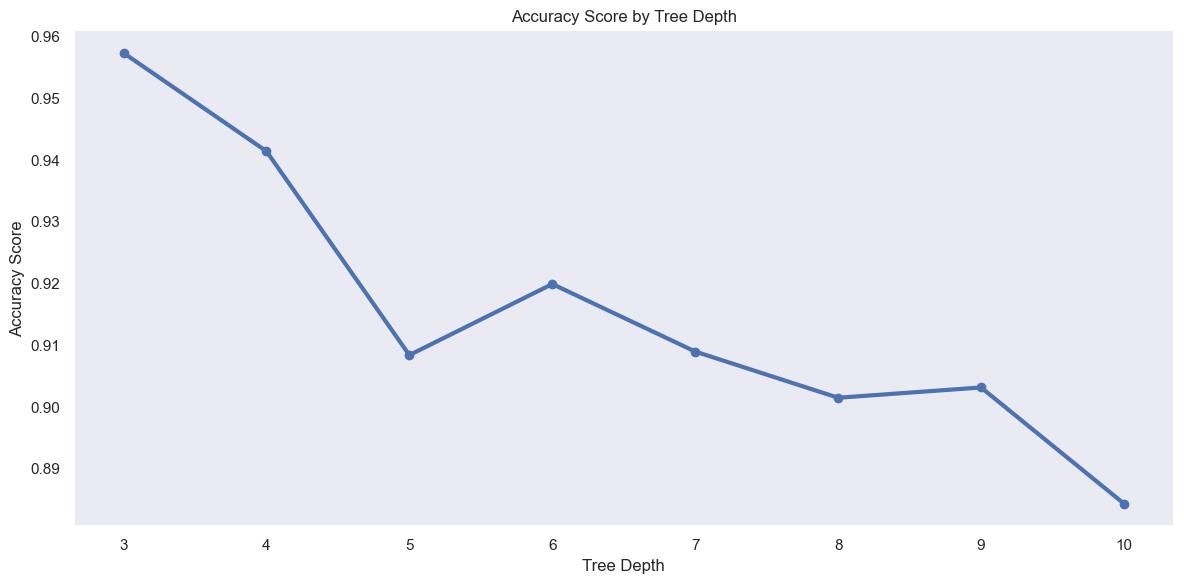

The best accuracy was 0.9574 with depth=3.


In [18]:
# decision tree
n = 11
acc_tree = np.zeros((n-3))

for i in range(3, n):

    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)

    tree.fit(X_rus, y_rus)

    y_pred_tree = tree.predict(X_test)

    acc_tree[i-3] = accuracy_score(y_test, y_pred_tree)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(3, n), acc_tree, linewidth=3, marker='o')
ax.set_title('Accuracy Score by Tree Depth')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Tree Depth')
ax.grid(False)

plt.tight_layout()
plt.show()

best_depth = acc_tree.argmax()+3
print(f'The best accuracy was {round(acc_tree.max(), 4)} with depth={best_depth}.') 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85291
           1       0.04      0.89      0.07       152

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.52     85443
weighted avg       1.00      0.96      0.98     85443



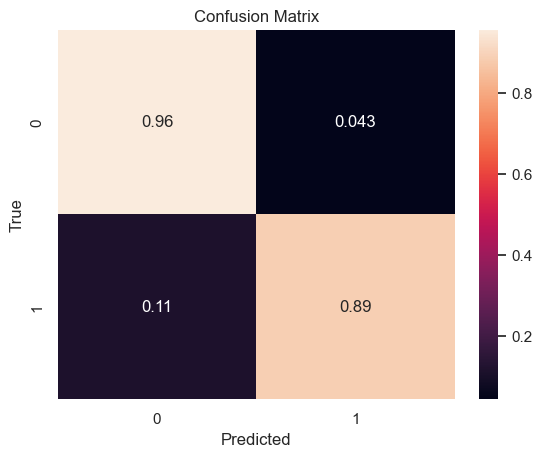

ROC AUC Score: 0.9228


In [19]:

tree_under = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)

tree_under.fit(X_rus, y_rus)

y_pred_tree_under = tree_under.predict(X_test)

report(y_pred_tree_under)
     


              precision    recall  f1-score   support

           0       1.00      0.93      0.97     85291
           1       0.02      0.91      0.05       152

    accuracy                           0.93     85443
   macro avg       0.51      0.92      0.51     85443
weighted avg       1.00      0.93      0.96     85443



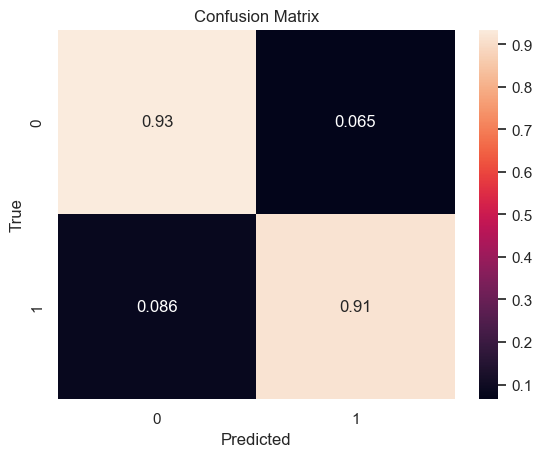

ROC AUC Score: 0.9245


In [20]:

tree_over = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)

tree_over.fit(X_ros, y_ros)

y_pred_tree_over = tree_over.predict(X_test)

report(y_pred_tree_over)


C:\Users\leend\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\leend\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

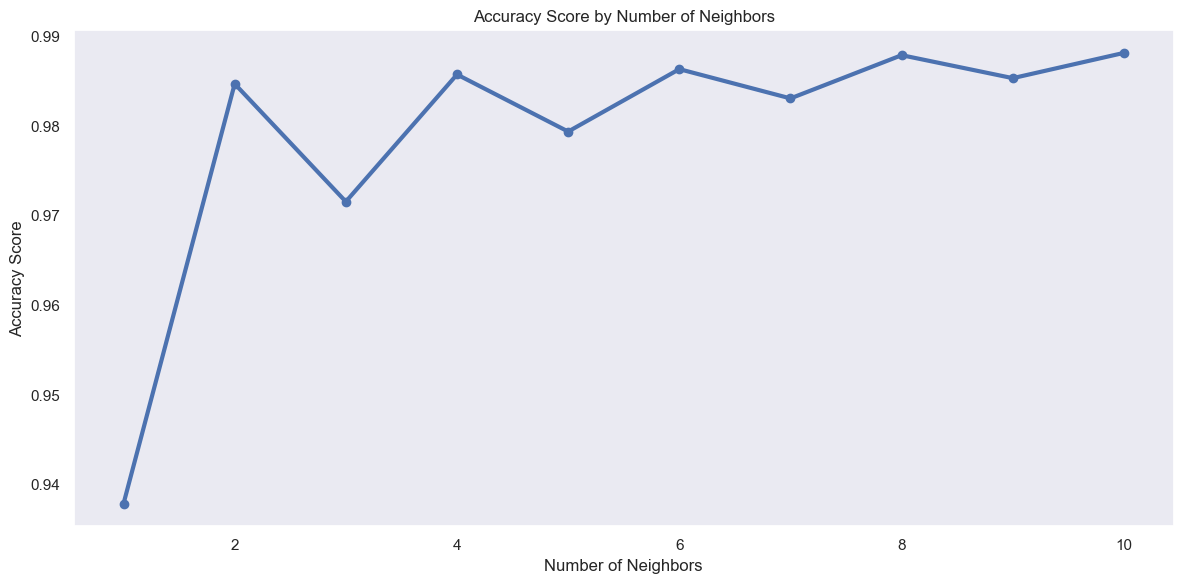

The best accuracy was 0.9882 with k=10.


In [21]:
# K - nearest Neighbors
Ks = 11
acc_knn = np.zeros((Ks-1))

for k in range(1, Ks):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_rus, y_rus)

    y_pred_knn = knn.predict(X_test)

    acc_knn[k-1] = accuracy_score(y_test, y_pred_knn)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(1, Ks), acc_knn, linewidth=3, marker='o')
ax.set_title('Accuracy Score by Number of Neighbors')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Number of Neighbors')
ax.grid(False)

plt.tight_layout()
plt.show()

best_k = acc_knn.argmax()+1
print(f'The best accuracy was {round(acc_knn.max(), 4)} with k={best_k}.') 

C:\Users\leend\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85291
           1       0.12      0.88      0.21       152

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443



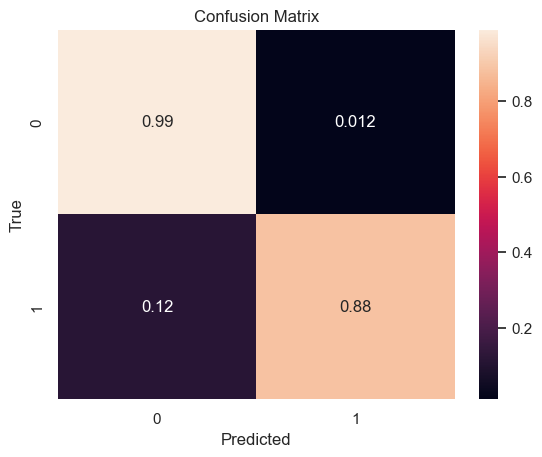

ROC AUC Score: 0.935


In [22]:
knn_under = KNeighborsClassifier(n_neighbors=best_k)

knn_under.fit(X_rus, y_rus)

y_pred_knn_under = knn_under.predict(X_test)

report(y_pred_knn_under)

C:\Users\leend\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.55      0.84      0.66       152

    accuracy                           1.00     85443
   macro avg       0.77      0.92      0.83     85443
weighted avg       1.00      1.00      1.00     85443



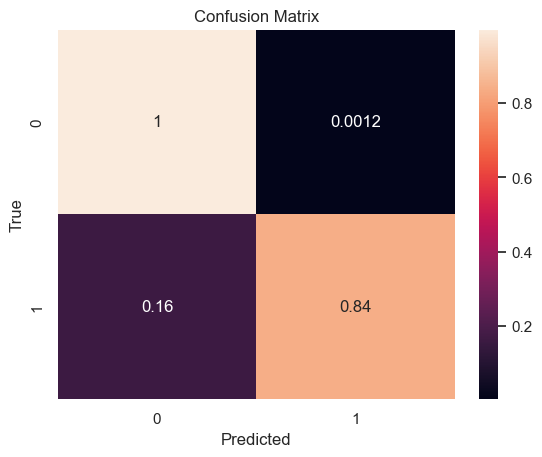

ROC AUC Score: 0.9204


In [24]:
knn_over = KNeighborsClassifier(n_neighbors=best_k)

knn_over.fit(X_ros, y_ros)

y_pred_knn_over = knn_over.predict(X_test)

report(y_pred_knn_over)
     


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.92      0.80      0.86       152

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



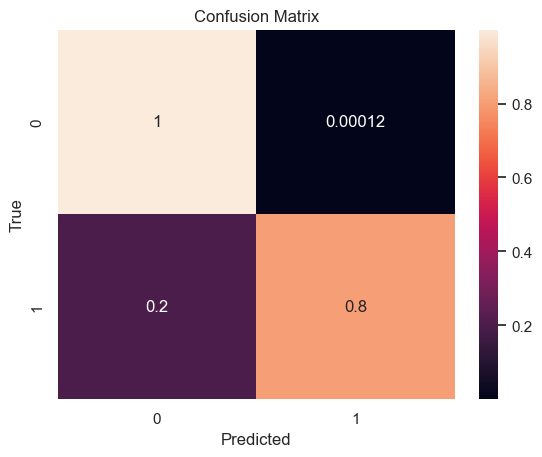

ROC AUC Score: 0.9013


In [25]:
#XGBoost

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

report(y_pred_xgb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.89      0.81      0.85       152

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



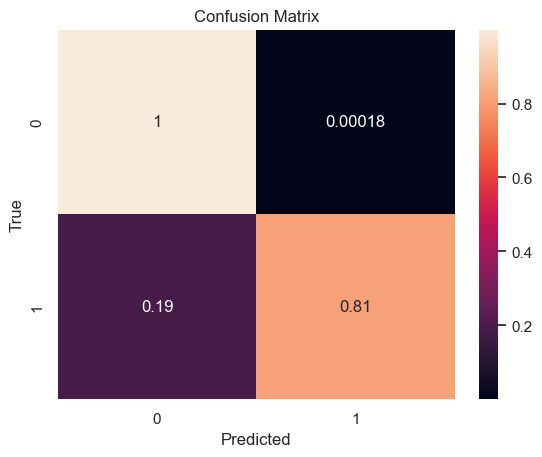

ROC AUC Score: 0.9045


In [26]:
# Caculating the ratio
counter = Counter(y_train)
estimate = counter[0] / counter[1]

# Implementing the model
xgb = XGBClassifier(scale_pos_weight=estimate)

xgb.fit(X_train, y_train)

y_pred_xgb_scaled = xgb.predict(X_test)

report(y_pred_xgb_scaled)

In [27]:
#Comparing the models 
summary = pd.DataFrame(data={
'labels': ['Accuracy', 'Precision', 'Recall', 'F1_score', 'roc_auc'],
'log_reg_under': [accuracy_score(y_test, y_pred_log_under), precision_score(y_test, y_pred_log_under), recall_score(y_test, y_pred_log_under), f1_score(y_test, y_pred_log_under), roc_auc_score(y_test, y_pred_log_under)],
'log_reg_over': [accuracy_score(y_test, y_pred_log_over), precision_score(y_test, y_pred_log_over), recall_score(y_test, y_pred_log_over), f1_score(y_test, y_pred_log_over), roc_auc_score(y_test, y_pred_log_over)],
'decision_trees_under': [accuracy_score(y_test, y_pred_tree_under), precision_score(y_test, y_pred_tree_under), recall_score(y_test, y_pred_tree_under), f1_score(y_test, y_pred_tree_under), roc_auc_score(y_test, y_pred_tree_under)],
'decision_trees_over': [accuracy_score(y_test, y_pred_tree_over), precision_score(y_test, y_pred_tree_over), recall_score(y_test, y_pred_tree_over), f1_score(y_test, y_pred_tree_over), roc_auc_score(y_test, y_pred_tree_over)],
'knn_under': [accuracy_score(y_test, y_pred_knn_under), precision_score(y_test, y_pred_knn_under), recall_score(y_test, y_pred_knn_under), f1_score(y_test, y_pred_knn_under), roc_auc_score(y_test, y_pred_knn_under)],
'knn_over': [accuracy_score(y_test, y_pred_knn_over), precision_score(y_test, y_pred_knn_over), recall_score(y_test, y_pred_knn_over), f1_score(y_test, y_pred_knn_over), roc_auc_score(y_test, y_pred_knn_over)],
'XGBoost': [accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb), roc_auc_score(y_test, y_pred_xgb)],
'XGBoost_scaled': [accuracy_score(y_test, y_pred_xgb_scaled), precision_score(y_test, y_pred_xgb_scaled), recall_score(y_test, y_pred_xgb_scaled), f1_score(y_test, y_pred_xgb_scaled), roc_auc_score(y_test, y_pred_xgb_scaled)]
}).set_index('labels')
summary.index.name = None

summary

,log_reg_under,log_reg_over,decision_trees_under,decision_trees_over,knn_under,knn_over,XGBoost,XGBoost_scaled
Accuracy,0.961167,0.975013,0.957352,0.934588,0.988179,0.998479,0.999532,0.999485
Precision,0.040627,0.061477,0.035885,0.024322,0.119005,0.547009,0.924242,0.891304
Recall,0.921053,0.914474,0.888158,0.914474,0.881579,0.842105,0.802632,0.809211
F1_score,0.077821,0.115209,0.068983,0.047384,0.209703,0.663212,0.859155,0.848276
roc_auc,0.941146,0.944797,0.922816,0.924549,0.934974,0.920431,0.901257,0.904517
